In [147]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

df=df.dropna()

# Read in the data

df = pd.read_csv('~/Downloads/movies 2.csv')


In [195]:
#looking at the data

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,monthandyearcorrect,monthdateyearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,NaN,"June 13, 1980","June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,NaN,"July 2, 1980","July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,NaN,"June 20, 1980","June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,NaN,"July 2, 1980","July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,NaN,"July 25, 1980","July 25, 1980"


In [190]:
#looking for any issues 


for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
newdf=df.dropna(axis=0)
print(newdf.isnull().sum(),'\n')

name - 0.0%
rating - 0.002207505518763797%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0001839587932303164%
budget - 0.0%
gross - 0.0%
company - 0.0003679175864606328%
runtime - 0.0001839587932303164%
yearcorrect - 1.0%
monthandyearcorrect - 0.0%
name                   0.0
rating                 0.0
genre                  0.0
year                   0.0
released               0.0
score                  0.0
votes                  0.0
director               0.0
writer                 0.0
star                   0.0
country                0.0
budget                 0.0
gross                  0.0
company                0.0
runtime                0.0
yearcorrect            0.0
monthandyearcorrect    0.0
dtype: float64 



In [197]:
#creating a year correct column incase there are any descrepencies

df['monthdateyearcorrect'] = df['released'].astype(str).str[:13]
df.head()
                                                                       

NameError: name 'remove' is not defined

In [6]:
# looking at data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [150]:
print(df[df['gross'].isnull()])
print(df[df['budget'].isnull()])

df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

df = df.dropna(subset=['gross'])
               
df = df.dropna(subset=['budget'])

df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)

                                           name     rating      genre  year  \
27                            Raise the Titanic         PG     Action  1980   
41                               Breaker Morant         PG      Drama  1980   
47                               The Boogey Man          R     Horror  1980   
49                           Lion of the Desert         PG  Biography  1980   
52                         Can't Stop the Music         PG  Biography  1980   
55                             The Private Eyes         PG     Comedy  1980   
59                                    Hangar 18         PG     Sci-Fi  1980   
62                                 It's My Turn          R     Comedy  1980   
66             Moscow Does Not Believe in Tears         PG     Comedy  1980   
79                                   Windwalker         PG  Adventure  1980   
91                          Mantis Fist Fighter        NaN     Action  1980   
125                               Dead & Buried     

                                                   name     rating      genre  \
16                                                 Fame          R      Drama   
19                                           Stir Crazy          R     Comedy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
34                                 Seems Like Old Times         PG     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                          

In [151]:
df.sort_values(by=['gross'], inplace= False, ascending= False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [132]:
# budget high correlation
# company high correlation
pd.set_option('display.max_rows', None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


<function matplotlib.pyplot.show(close=None, block=None)>

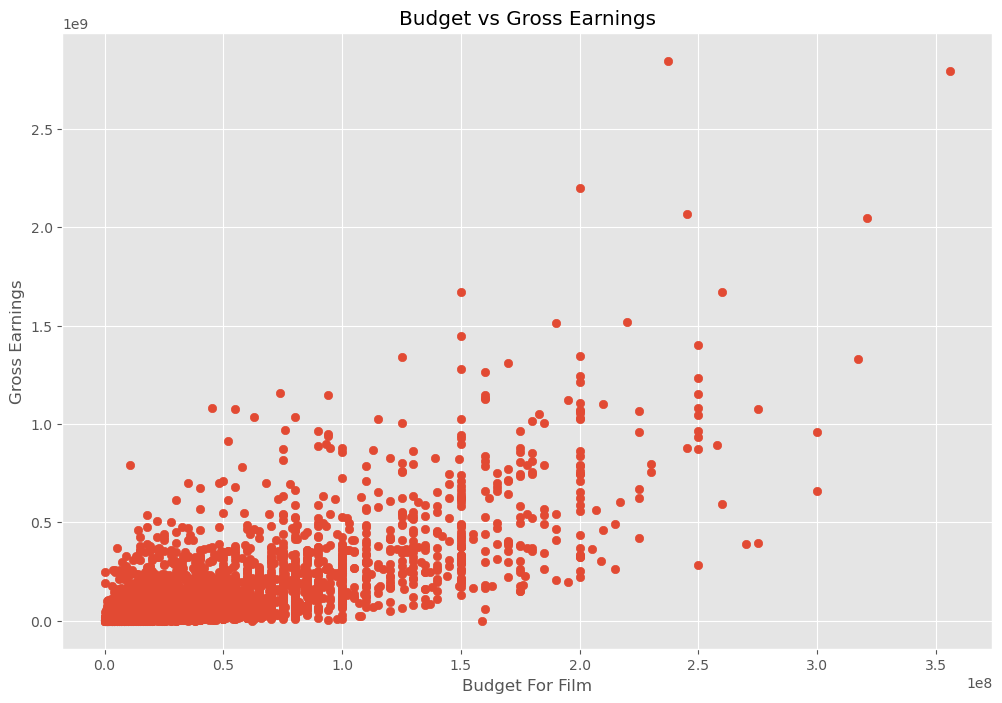

In [115]:
#scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget For Film')

plt.ylabel('Gross Earnings')

plt.show

In [96]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


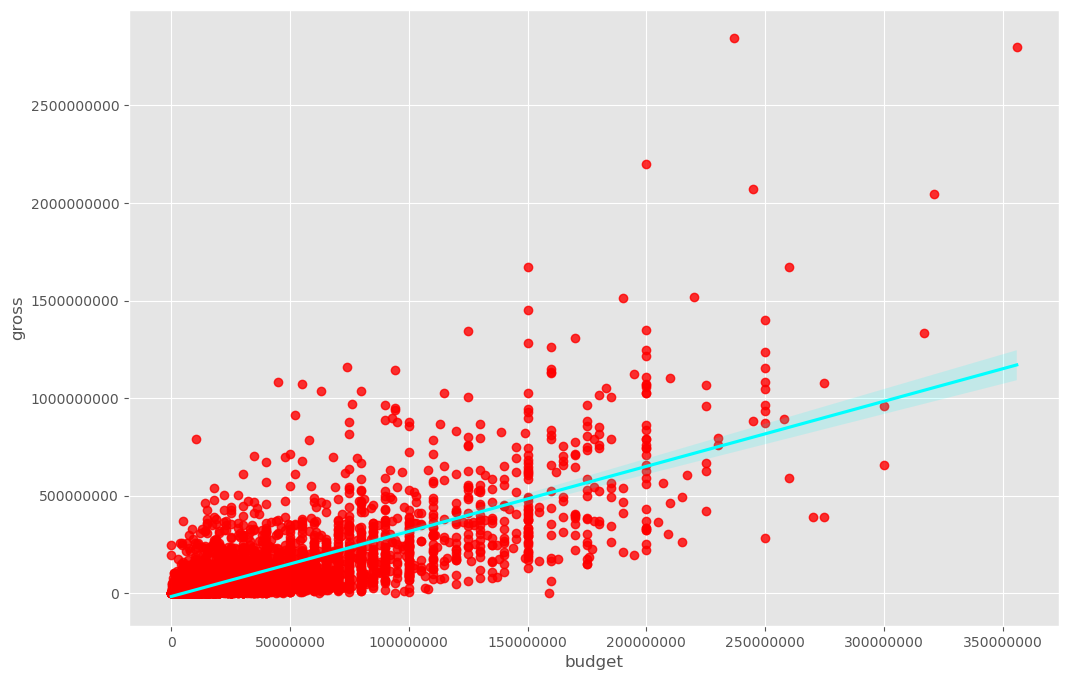

In [107]:
# PLot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"cyan"})
ax = plt.gca()
plt.ticklabel_format(style='plain') 

In [108]:
#Correlation

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203,0.998641
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
yearcorrect,0.998641,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


In [ ]:
#High correlation between budget and gross

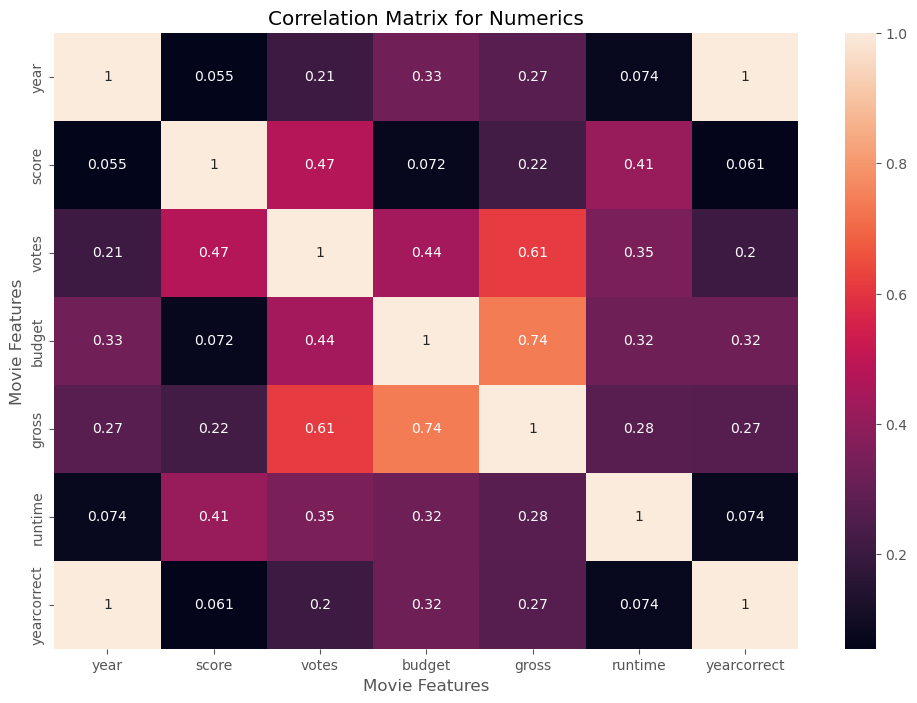

In [112]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numerics')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')


plt.show()


In [ ]:
# Looking at Company and making them numeric

In [133]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [152]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


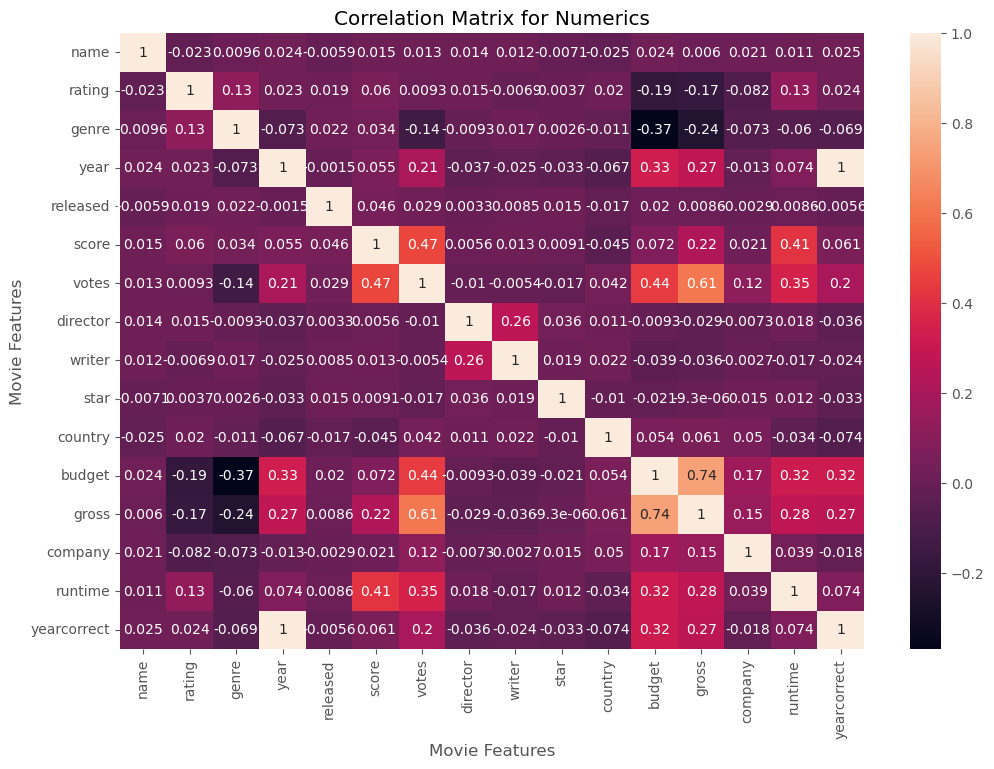

In [123]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numerics')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')


plt.show()

In [124]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800,0.024734
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239,0.023634
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186,-0.068848
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203,0.998641
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619,-0.005625
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580,0.061029
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437,0.202883
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082,-0.036281
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672,-0.024397
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439,-0.033168


In [125]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.023013
             genre          0.009617
             year           0.024435
             released      -0.005896
             score          0.014955
             votes          0.012915
             director       0.013699
             writer         0.011602
             star          -0.007109
             country       -0.024555
             budget         0.023698
             gross          0.005966
             company        0.021209
             runtime        0.010800
             yearcorrect    0.024734
rating       name          -0.023013
             rating         1.000000
             genre          0.128102
             year           0.022668
             released       0.018836
             score          0.059550
             votes          0.009255
             director       0.014847
             writer        -0.006923
             star           0.003737
             country        0.020148
 

In [126]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368900
genre        budget        -0.368900
             gross         -0.244380
gross        genre         -0.244380
rating       budget        -0.186892
budget       rating        -0.186892
rating       gross         -0.168814
gross        rating        -0.168814
votes        genre         -0.136457
genre        votes         -0.136457
company      rating        -0.082189
rating       company       -0.082189
country      yearcorrect   -0.073732
yearcorrect  country       -0.073732
company      genre         -0.073293
genre        company       -0.073293
year         genre         -0.073026
genre        year          -0.073026
             yearcorrect   -0.068848
yearcorrect  genre         -0.068848
year         country       -0.066662
country      year          -0.066662
genre        runtime       -0.060186
runtime      genre         -0.060186
country      score         -0.044690
score        country       -0.044690
writer       budget        -0.039420
b

In [127]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614904
votes        gross          0.614904
gross        budget         0.740395
budget       gross          0.740395
year         yearcorrect    0.998641
yearcorrect  year           0.998641
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Movie budget and acquired votes have highest correlation to gross earnings
